In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
gtf = pd.read_csv('~/Dev/Drosophila_inferelator/Drosophila_melanogaster.BDGP6.91.genes.gtf', sep='\t', header = None)

In [5]:
gene_id_to_sym = {}
for (idx, row) in gtf.iterrows():
    st = row[8]
    splits = st.split(';')
    i = splits[0].split(" ")[1].strip('"')
    sym = splits[1].split(" ")[2].strip('"').rstrip(';').rstrip('"').replace(';', '')
    gene_id_to_sym[i] = sym

In [7]:
output_folder = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_outputs/2018-01-24_08-15-33"

In [8]:
net = pd.read_csv(os.path.join(output_folder, 'network.tsv'), sep='\t')

In [9]:
net.head()

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
0,FBgn0086680,FBgn0034138,-100.0,100.0,0.718103,0.999922,1.0
1,FBgn0005660,FBgn0030520,-100.0,100.0,0.617789,0.999845,1.0
2,FBgn0008649,FBgn0029888,100.0,100.0,0.563271,0.999751,1.0
3,FBgn0008649,FBgn0000150,100.0,100.0,0.637196,0.999729,1.0
4,FBgn0008646,FBgn0033699,100.0,100.0,0.560055,0.999672,1.0


In [10]:
len(set(net['target']))

5332

In [11]:
len(set(net['regulator']))

328

In [29]:
ids = gene_id_to_sym.keys()

In [30]:
Label = [gene_id_to_sym[i] for i in ids]

In [34]:
for reg in set(net['regulator']):
    if reg not in gene_id_to_sym.keys():
        ids.append(reg)
        Label.append(reg)

In [35]:
nodes = pd.DataFrame([ids, Label]).transpose()
nodes.columns = ['id', 'Label']

In [36]:
nodes.shape

(17772, 2)

In [25]:
gene_id_to_sym['Fbgn0086680']

KeyError: 'Fbgn0086680'

In [28]:
'Fbgn0086680' in set(net['target']) 

False

In [104]:
nodes.to_csv(os.path.join(output_folder, 'nodes.tsv'), sep='\t', index=None)

In [43]:
activity = pd.read_csv(os.path.join(output_folder, 'activity.tsv'), sep='\t', index_col=0)

In [44]:
activity.shape

(328, 704)

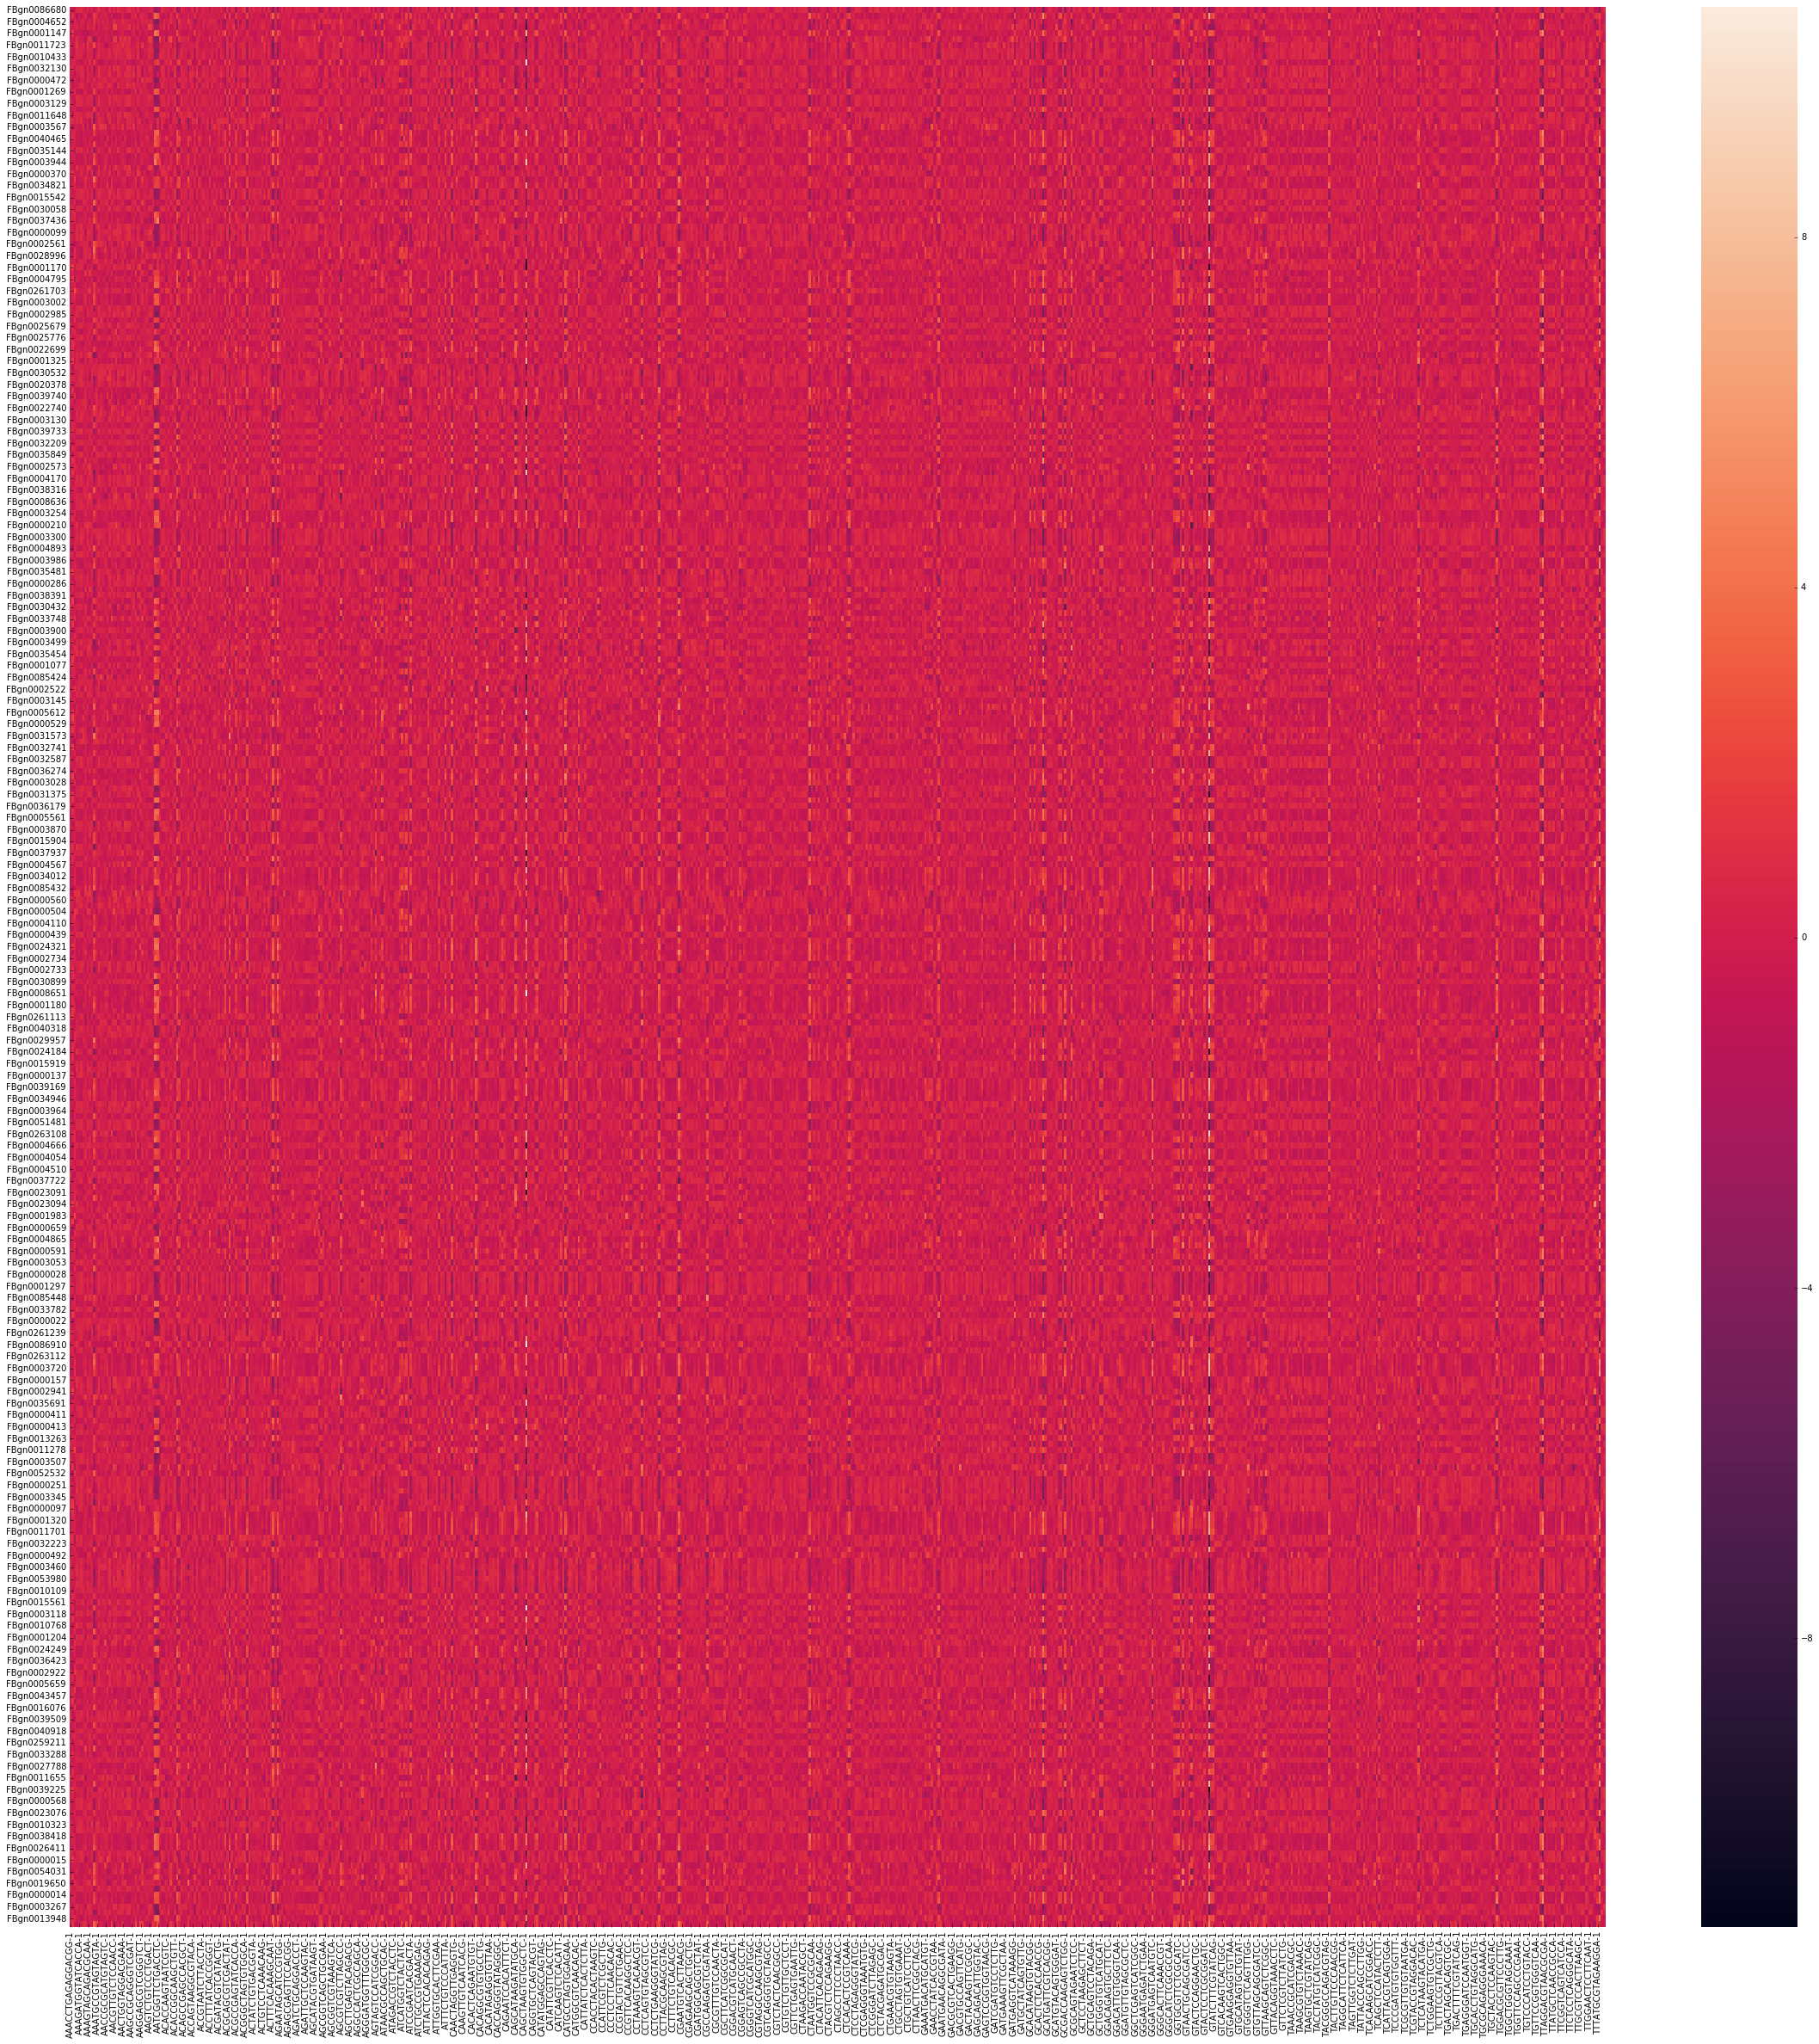

In [59]:
plt.figure(figsize = (40,40))
sns.heatmap(scaled_df)

In [57]:
activity.head()

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGGAACAGTGTTAGA-1,TTGGAACGTGGTCTCG-1,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTATGCGTAGAAGGA-1,TTTCCTCCACGGCCAT-1,TTTGCGCAGTACGCGA-1,TTTGGTTGTCCCTACT-1
FBgn0086680,-0.651121,-1.669128,-1.433262,-0.537277,-0.650578,-0.427879,-0.836843,-1.162362,-0.526503,-1.209713,...,-0.371863,-2.007137,-1.294013,-0.384344,-0.502200,-1.705745,-1.777406,-3.917487,-0.918501,-0.453206
FBgn0004396,0.551872,1.320125,0.640107,-0.124845,0.747393,0.399140,0.660839,1.074864,0.056953,0.143028,...,0.112082,1.066115,1.088565,0.227349,0.499273,1.270906,1.457954,1.932492,0.674009,0.577577
FBgn0004652,0.086017,-0.298775,0.180619,-0.021008,-0.065419,0.106262,0.219088,-0.113605,0.006902,0.153698,...,0.145360,0.208264,0.104131,0.139859,0.072020,-0.931079,-0.051910,0.432132,-0.205553,0.043685
FBgn0004394,-0.036869,-0.150867,-0.051056,0.053692,-0.275511,-0.091763,-0.127590,-0.374503,0.130533,-0.040258,...,0.149502,-0.431914,0.236438,-0.155162,-0.208207,-0.607556,-0.813031,0.229418,-0.200795,0.088156
FBgn0001147,0.101408,1.000930,0.120810,0.032847,0.293086,0.129015,0.022214,0.001383,-0.201502,0.109913,...,0.329269,0.390583,0.684834,-0.042899,0.403545,0.288262,1.277596,1.013492,0.653324,0.298520


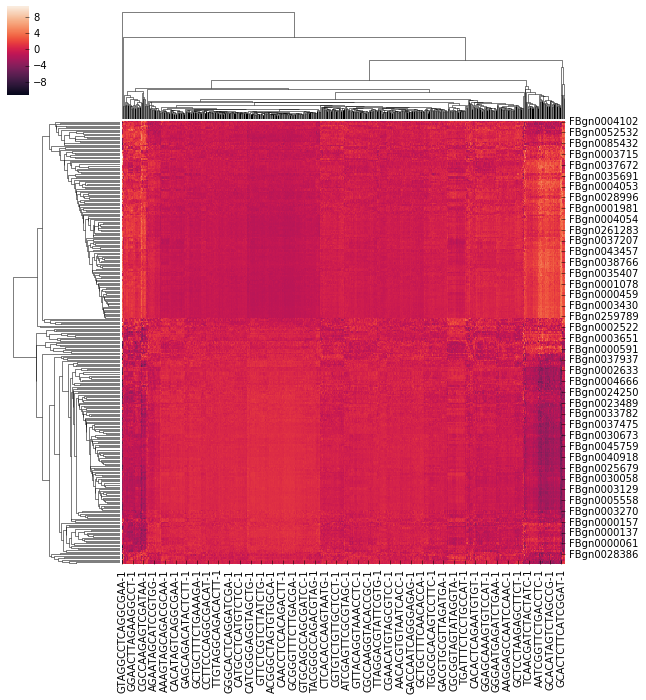

In [64]:
plt.figure(figsize = (60,60))
cluster_obj = sns.clustermap(scaled_df)
plt.show()

In [66]:
from sklearn import preprocessing
from scipy.cluster.hierarchy import fcluster


In [58]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(activity.transpose())
scaled_df = pd.DataFrame(scaled_df.transpose(), columns=activity.columns, index=activity.index)

In [67]:
clusts = {}
Z = cluster_obj.dendrogram_row.calculated_linkage
for max_clusts in range(2, 20):
    clusts[max_clusts] = fcluster(Z, max_clusts, criterion='maxclust')

In [79]:
cluster_obj.dendrogram_col.calculated_linkage

array([[  463.        ,   622.        ,     4.00345434,     2.        ],
       [  360.        ,   641.        ,     4.02174194,     2.        ],
       [  108.        ,   123.        ,     4.02305099,     2.        ],
       ..., 
       [ 1402.        ,  1403.        ,    58.94197938,   702.        ],
       [  209.        ,  1404.        ,    82.16486341,   703.        ],
       [  522.        ,  1405.        ,   107.36872683,   704.        ]])

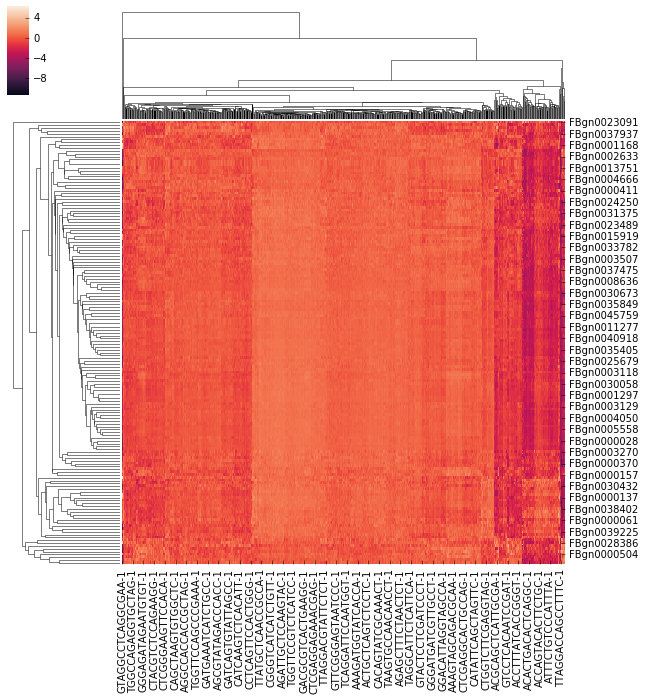

In [84]:
sns.clustermap(scaled_df[clusts[4] == 4])

In [75]:
scaled_df[clusts[4] == 4]

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGGAACAGTGTTAGA-1,TTGGAACGTGGTCTCG-1,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTATGCGTAGAAGGA-1,TTTCCTCCACGGCCAT-1,TTTGCGCAGTACGCGA-1,TTTGGTTGTCCCTACT-1
FBgn0086680,0.612090,-0.810535,-0.480921,0.771183,0.612850,0.924062,0.352551,-0.102349,0.786239,-0.168520,...,1.002343,-1.282889,-0.286326,0.984901,0.820201,-0.861706,-0.961849,-3.952529,0.238437,0.888669
FBgn0004652,0.197894,-1.029175,0.499571,-0.143398,-0.285024,0.262453,0.622246,-0.438684,-0.054398,0.413722,...,0.387132,0.587729,0.255657,0.369590,0.153260,-3.045537,-0.241942,1.301624,-0.731897,0.062901
FBgn0004394,0.301550,-0.028437,0.260483,0.563696,-0.389241,0.142651,0.038942,-0.675792,0.786127,0.291742,...,0.841035,-0.841979,1.092688,-0.040869,-0.194419,-1.350406,-1.945191,1.072369,-0.172963,0.663458
FBgn0004837,-0.100796,-0.061091,-0.395667,0.832164,-0.179825,-0.068152,-0.222354,-1.349033,0.792119,1.442292,...,0.444318,-0.648677,-0.835457,0.420614,-0.156408,0.432366,-1.900073,2.016656,-0.409440,-0.504462
FBgn0011723,0.922795,-0.844093,0.345849,1.341211,0.230919,0.246832,0.833880,-0.353182,1.596242,0.027283,...,1.071791,-0.630217,0.165352,1.226005,0.489215,-0.258509,0.763933,-2.906542,-0.480694,1.163115
FBgn0000576,0.392198,-0.709902,-0.318230,0.690016,0.515077,0.598042,0.215175,-0.331876,0.618692,0.587036,...,0.914976,-1.095809,-0.266741,0.792633,0.463353,0.044095,-1.675939,-2.865342,0.212245,0.833344
FBgn0010433,0.179353,-0.532278,0.042306,0.688234,0.456869,0.627243,-0.414151,-0.533467,0.627477,0.269094,...,1.153867,-1.380578,0.423161,0.887660,0.585764,-0.759297,-2.092548,-3.309135,0.450789,0.830742
FBgn0032130,0.538402,0.620124,-0.574499,0.543822,0.388965,0.851102,0.401684,-0.585344,0.787468,-0.632944,...,1.079578,-1.333981,0.096240,1.110898,0.561629,1.281406,-0.400244,-4.464910,0.376794,0.491496
FBgn0003270,0.170406,-0.012325,-1.282457,0.200529,0.064077,0.726254,0.791654,-0.755932,0.563584,0.116691,...,1.027632,-1.961763,-0.683259,0.710389,0.342825,-0.466498,-0.135303,-4.688523,0.773490,0.852392
FBgn0000472,0.003985,-1.953642,0.280164,-0.104588,-0.610940,0.289325,0.317245,-0.279918,0.946399,0.112586,...,-0.123668,1.151505,0.755980,0.349467,0.307717,-4.150009,-1.934945,1.828432,0.073126,1.063347


In [86]:
in_folder = '~/Dev/inferelator_ng/data/dmel'
exp = pd.read_csv(os.path.join(in_folder, 'expression.tsv'), sep='\t', index_col=0)

In [92]:
expressed_tfs = set(scaled_df.index).intersection(set(exp.index))

In [94]:
expressed_tfs

{'FBgn0000014',
 'FBgn0000097',
 'FBgn0000286',
 'FBgn0000370',
 'FBgn0000504',
 'FBgn0000546',
 'FBgn0000567',
 'FBgn0000568',
 'FBgn0000611',
 'FBgn0000964',
 'FBgn0001078',
 'FBgn0001168',
 'FBgn0001185',
 'FBgn0001222',
 'FBgn0001235',
 'FBgn0001291',
 'FBgn0001297',
 'FBgn0001994',
 'FBgn0002521',
 'FBgn0002609',
 'FBgn0002633',
 'FBgn0002723',
 'FBgn0002733',
 'FBgn0003118',
 'FBgn0003345',
 'FBgn0003396',
 'FBgn0003507',
 'FBgn0003567',
 'FBgn0003870',
 'FBgn0003964',
 'FBgn0004050',
 'FBgn0004396',
 'FBgn0004510',
 'FBgn0004652',
 'FBgn0004837',
 'FBgn0004859',
 'FBgn0004865',
 'FBgn0004870',
 'FBgn0004893',
 'FBgn0004914',
 'FBgn0005612',
 'FBgn0005694',
 'FBgn0011236',
 'FBgn0011648',
 'FBgn0011655',
 'FBgn0013263',
 'FBgn0013753',
 'FBgn0013799',
 'FBgn0014018',
 'FBgn0014343',
 'FBgn0015239',
 'FBgn0015664',
 'FBgn0016076',
 'FBgn0017578',
 'FBgn0020309',
 'FBgn0022699',
 'FBgn0022935',
 'FBgn0023094',
 'FBgn0023215',
 'FBgn0024250',
 'FBgn0027339',
 'FBgn0029711',
 'FBgn00

In [93]:
len(expressed_tfs)

104

In [90]:
nodes['expressed'] = 0

In [101]:
nodes.loc[list(exp.index), 'expressed'] = 1

In [97]:
nodes.index = nodes['id']

In [102]:
nodes.shape

(17772, 3)

In [103]:
exp.index

Index([u'FBgn0085412', u'FBgn0039265', u'FBgn0011336', u'FBgn0038274',
       u'FBgn0039266', u'FBgn0033357', u'FBgn0028689', u'FBgn0030196',
       u'FBgn0038438', u'FBgn0267972',
       ...
       u'FBgn0264834', u'FBgn0283525', u'FBgn0038128', u'FBgn0027057',
       u'FBgn0040010', u'FBgn0010228', u'FBgn0030403', u'FBgn0001098',
       u'FBgn0004868', u'FBgn0265590'],
      dtype='object', length=5332)